In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')



plt.style.use("fivethirtyeight")

%matplotlib inline
pd.set_option('display.max_columns',30)

In [4]:
df=pd.read_csv('us_perm_visas.csv')
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,...,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,NaN,POLAND,2011-12-21,200 BROAD STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,NaN,SOUTH KOREA,2011-12-01,33-17 PRINCE ST. 2ND FL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,NaN,CANADA,2012-01-26,1373 BROADWAY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,SOUTH KOREA,NaN,2016-12-30,434 S EUCLID STREET STE 100,None,...,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,VIETNAM,NaN,2016-12-30,ONE MICROSOFT WAY,None,...,Y,2016-07-27,2016-07-27,Y,NaN,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,INDIA,NaN,2016-12-30,220 W MICHIGAN AVE,None,...,N,2016-07-21,2016-07-28,Y,NaN,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,SOUTH KOREA,NaN,2016-12-30,3957 E. Camelback Rd,None,...,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


In [6]:
df.shape

(374362, 154)

In [7]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [8]:
df.columns.values

array(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'country_of_citzenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_phone_ext',
       'employer_postal_code', 'employer_state', 'employer_yr_estab',
       'foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country', 'foreign_worker_info_city',
       'foreign_worker_info_education',
       'foreign_worker_info_education_other', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_postal_code',
       'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience', 'foreign_worker_info_state',
       'forei

In [11]:
df[['case_number','case_no']]

,case_number,case_no
0,NaN,A-07323-97014
1,NaN,A-07332-99439
2,NaN,A-07333-99643
3,NaN,A-07339-01930
4,NaN,A-07345-03565
...,...,...
374357,A-16363-85407,NaN
374358,A-16271-56745,NaN
374359,A-16354-82345,NaN
374360,A-16357-84250,NaN


In [12]:
df.drop('case_no',axis=1,inplace=True)

In [13]:
df.case_status

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

In [28]:
df=df[df["case_status"]!='Withdrawn'] #withdrawn applications shouldnot analysed

In [29]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,...,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Denied,B-2,NaN,POLAND,2011-12-21,200 BROAD STREET,NaN,CARLSTADT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,GLEN ALLEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,B-2,NaN,SOUTH KOREA,2011-12-01,33-17 PRINCE ST. 2ND FL,NaN,FLUSHING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,L-1,NaN,CANADA,2012-01-26,1373 BROADWAY,NaN,ALBANY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374349,NaN,Cincinnati,Dinsmore & Shohl LLP,OH,NaN,A-16295-63980,2016-10-31,Certified,H-1B,INDIA,NaN,2016-12-30,1020 Petersburg Road,None,Hebron,...,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"85,000.00","90,000.00",Year,NaN,NaN,NaN
374350,NaN,Addison,"Fragomen, Del Rey, Bernsen & Loewy, LLP",TX,NaN,A-16291-62511,2016-10-31,Certified,H-1B,INDIA,NaN,2016-12-30,2000 EASTMAN DRIVE,None,MILFORD,...,N,2016-09-09,2016-09-15,Y,NaN,NaN,NaN,N,NaN,"73,000.00","110,706.00",Year,NaN,NaN,NaN
374351,NaN,Santa Clara,"CHUGH, LLP",CA,NaN,A-16280-59783,2016-10-31,Certified,L-1,INDIA,NaN,2016-12-30,1741 TECHNOLOGY DRIVE,SUITE 400,SAN JOSE,...,N,2016-08-31,2016-09-06,Y,NaN,NaN,NaN,N,NaN,"114,795.00",NaN,Year,NaN,NaN,NaN
374352,NaN,New York,"Fragomen, Del Rey, Bernsen & Loewy, LLP",NY,NaN,A-16292-62639,2016-10-31,Certified,H-1B,INDIA,NaN,2016-12-30,60 WALL STREET,None,NEW YORK,...,N,2016-08-10,2016-08-10,Y,NaN,NaN,NaN,N,NaN,"115,000.00","115,000.00",Year,NaN,NaN,NaN


In [30]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired'], dtype=object)

In [37]:
df.loc[df.case_status=='Certified-Expired','case_status']='Certified'

In [38]:
df.case_status.unique()

array(['Certified', 'Denied'], dtype=object)

In [40]:
df.case_status.value_counts(normalize=True)

Certified    0.927986
Denied       0.072014
Name: case_status, dtype: float64

In [ ]:
#insights >> only 7% are denied

In [41]:
df.dropna(axis=1,how='all',inplace=True)
df.dropna(axis=0,how='all',inplace=True)

In [42]:
df.shape

(356168, 154)

In [43]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089',
       'Certified-Expired'],
      dtype='object', length=154)

In [44]:
df.application_type

0         PERM
1         PERM
2         PERM
3         PERM
4         PERM
          ... 
374349     NaN
374350     NaN
374351     NaN
374352     NaN
374353     NaN
Name: application_type, Length: 356168, dtype: object

<Axes: >

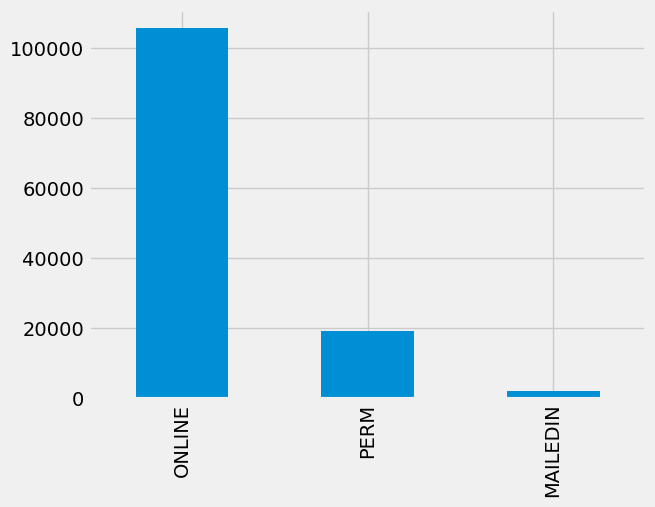

In [45]:
df['application_type'].value_counts().plot(kind='bar')

In [ ]:
# insights >> most people application_type with online

<Axes: xlabel='application_type', ylabel='count'>

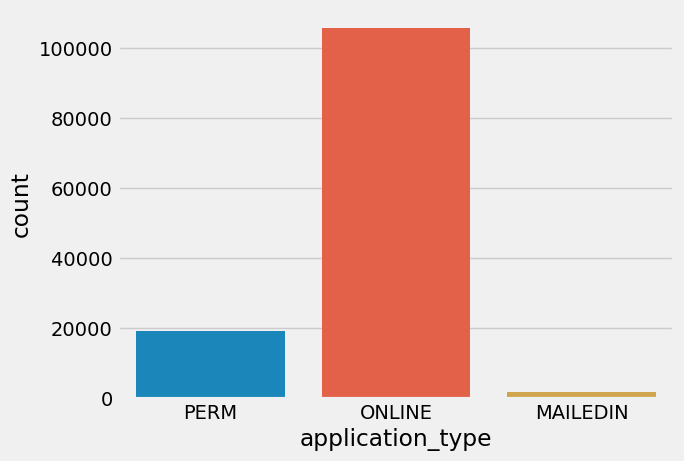

In [46]:
sns.countplot(data=df,x='application_type')

In [47]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_us_workers_considered', 'schd_a_sheepherder', 'us_economic_sector',
       'wage_offer_from_9089', 'wage_offer_to_9089',
       'wage_offer_unit_of_pay_9089', 'wage_offered_from_9089',
       'wage_offered_to_9089', 'wage_offered_unit_of_pay_9089',
       'Certified-Expired'],
      dtype='object', length=154)

In [48]:
df.us_economic_sector

0                            IT
1         Other Economic Sector
2                     Aerospace
3         Other Economic Sector
4                  Advanced Mfg
                  ...          
374349                      NaN
374350                      NaN
374351                      NaN
374352                      NaN
374353                      NaN
Name: us_economic_sector, Length: 356168, dtype: object

In [49]:
economic_sector = df['us_economic_sector'].value_counts()

In [50]:
economic_sector

IT                       49311
Advanced Mfg             17601
Other Economic Sector    14662
Finance                   8686
Educational Services      8561
Health Care               6407
Retail                    4208
Aerospace                 3917
Hospitality               1767
Construction              1315
Automotive                1084
Energy                    1021
Transportation             893
Agribusiness               784
Biotechnology              436
Geospatial                 137
Homeland Security           78
Name: us_economic_sector, dtype: int64

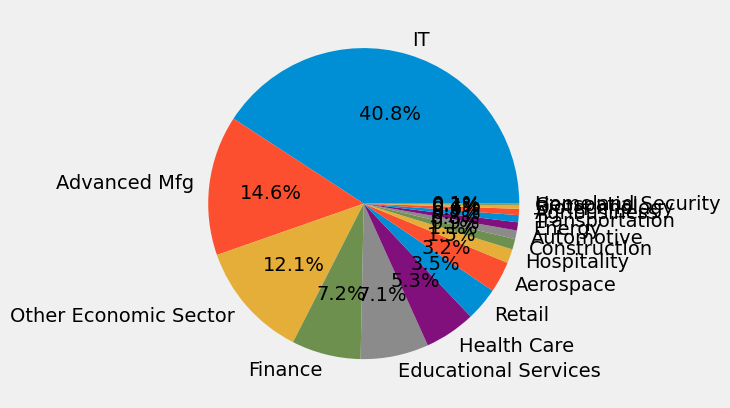

In [53]:
plt.pie(economic_sector,labels=economic_sector.index,autopct='%1.1f%%')
plt.show()

In [ ]:
# insights >> you willl get us visa IT

In [56]:
df['decision_date']=pd.to_datetime(df['decision_date'])
df['year']=df['decision_date'].dt.year

In [57]:
df['year']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374349    2016
374350    2016
374351    2016
374352    2016
374353    2016
Name: year, Length: 356168, dtype: int64

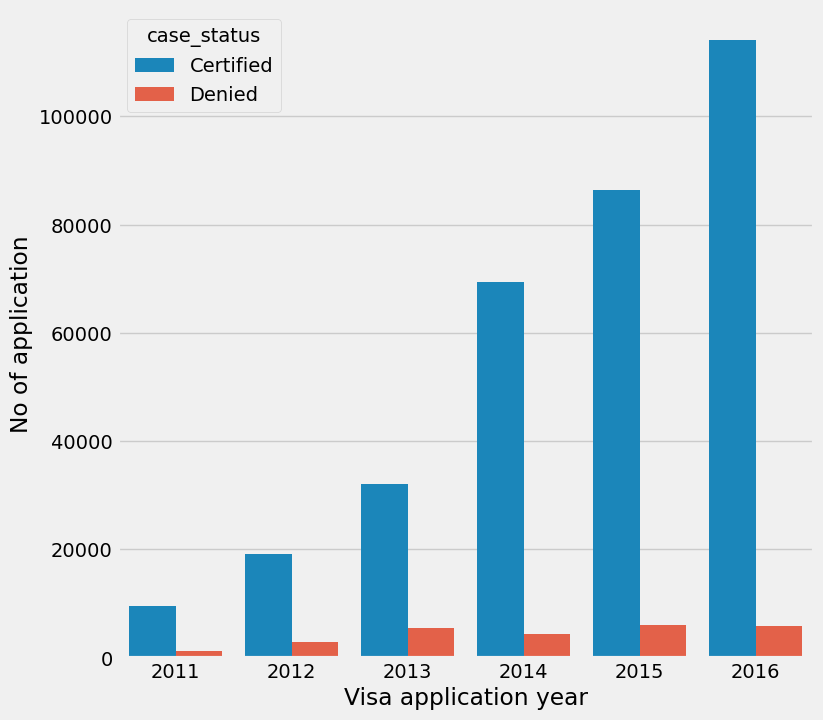

In [58]:
fig,ax=plt.subplots(figsize=(8,8))

sns.countplot(x='year',hue='case_status',data=df)
ax.set(xlabel='Visa application year',ylabel='No of application')
plt.show()

In [ ]:
# insights >> applications are increasing,deied and accepted are both increasing

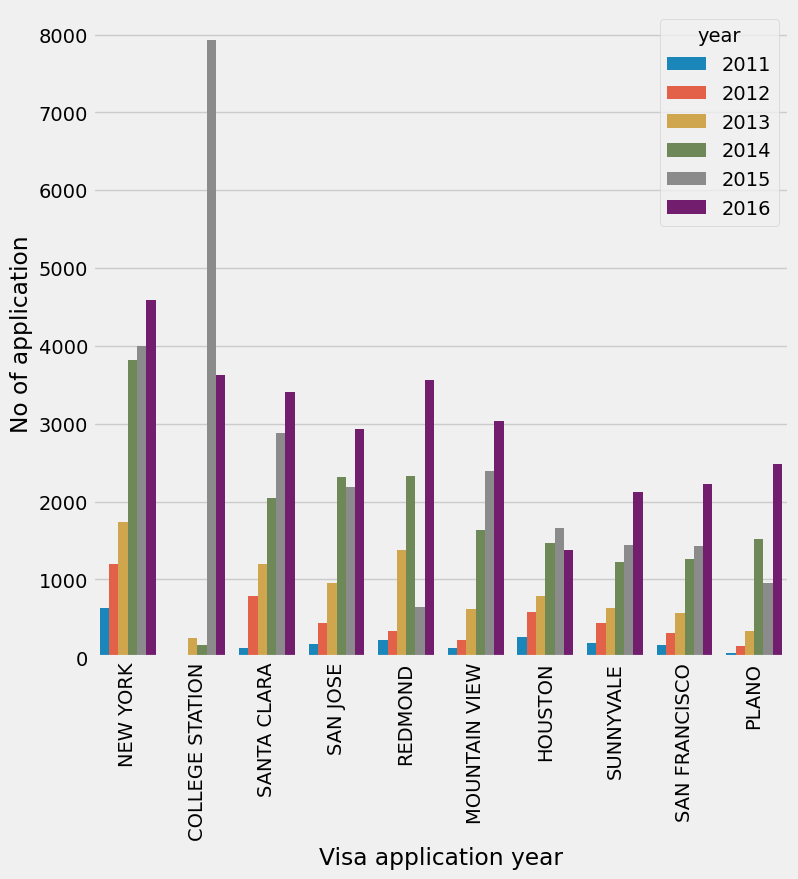

In [65]:
fig,ax=plt.subplots(figsize=(8,8))

sns.countplot(x='employer_city',hue='year',data=df,order=df.employer_city.value_counts().iloc[:10].index)
ax.set(xlabel='Visa application year',ylabel='No of application')
plt.xticks(rotation=90)
plt.show()